2109106099 Muhammad Syarafi Al Fasa POSTTEST 5

Import Library

In [67]:
# Impor library yang diperlukan
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from math import sqrt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score,calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score # ARI
from sklearn.metrics import normalized_mutual_info_score # NMI
from sklearn.metrics import homogeneity_score, completeness_score,v_measure_score # HCV-M


Membaca Dataset

In [68]:
data = pd.read_csv("Airlines.csv")
data

,id,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length,Delay
0,1,CO,269,SFO,IAH,3,15,205,1
1,2,US,1558,PHX,CLT,3,15,222,1
2,3,AA,2400,LAX,DFW,3,20,165,1
3,4,AA,2466,SFO,DFW,3,20,195,1
4,5,AS,108,ANC,SEA,3,30,202,0
...,...,...,...,...,...,...,...,...,...
539378,539379,CO,178,OGG,SNA,5,1439,326,0
539379,539380,FL,398,SEA,ATL,5,1439,305,0
539380,539381,FL,609,SFO,MKE,5,1439,255,0
539381,539382,UA,78,HNL,SFO,5,1439,313,1


A. Supervised Learning

Karena label pada dataset berupa numerik, maka saya menggunakan Linear Regression

A1. Linear Regression

In [69]:
# Pisahkan fitur (X) dan target (y)
X = data[['Time', 'Length']]
y = data['Delay']

In [70]:
# Bagi dataset menjadi data pelatihan dan data pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [71]:
# Inisialisasi model Linear Regression
model = LinearRegression()

In [72]:
# Latih model menggunakan data pelatihan
model.fit(X_train, y_train)


LinearRegression()

In [73]:
# Membuat prediksi menggunakan data pengujian
y_pred = model.predict(X_test)

A2. Evaluasi Hasil Prediksi

In [74]:
# Mengukur kinerja model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [75]:
print(f'Mean Absolute Error (MAE): {mae}')
print(f'Mean Squared Error (MSE): {mse}')
print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R-squared (R2-Score): {r2}')

Mean Absolute Error (MAE): 0.4816598456256418
Mean Squared Error (MSE): 0.24057607265992512
Root Mean Squared Error (RMSE): 0.49048554786040854
R-squared (R2-Score): 0.025879974355097923


A3. Plot

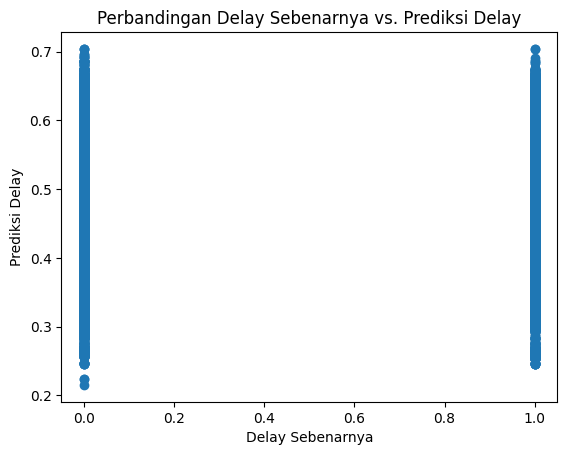

In [76]:
# Plot hasil prediksi
plt.scatter(y_test, y_pred)
plt.xlabel("Delay Sebenarnya")
plt.ylabel("Prediksi Delay")
plt.title("Perbandingan Delay Sebenarnya vs. Prediksi Delay")
plt.show()

B. Unsupervised Learning

B1. Metode K-Means

In [78]:
X = data[['Time', 'Length', 'Delay']]

In [79]:
K = 2 # Pilih angka banyaknya kelompok (K)


In [83]:
kmeans = KMeans(n_clusters=K, n_init=10) # Inisialisasi K-Means
kmeans.fit(X) # Latih model K-Means berdasarkan data X


KMeans(n_clusters=2, n_init=10)

In [84]:
cluster_labels = kmeans.labels_ # Label kelompok dari model
data["cluster"] = cluster_labels # Tambahkan kolom prediksi
centroids = kmeans.cluster_centers_ # Titik pusat kelompok dari model

C:\Users\Fasa\AppData\Local\Temp\ipykernel_7216\448015946.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.scatterplot(data=data, x="Time", y="Length",


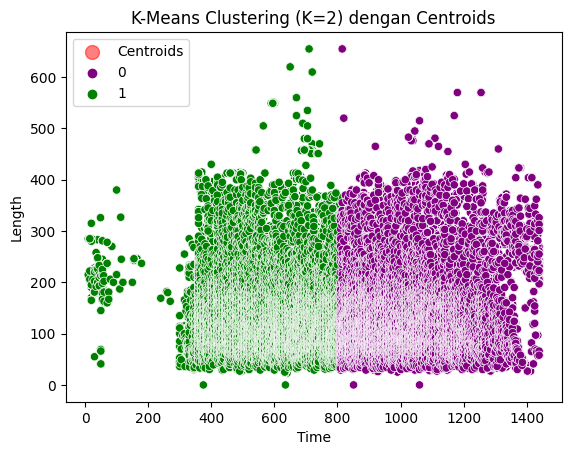

In [85]:
# Visualisasikan kelompok (kluster) data Iris
warna = ["purple", "green", "black"]
plt.scatter(centroids[:, 0], centroids[:, 1], alpha=0.5, c='red', s=100,
label='Centroids')
sns.scatterplot(data=data, x="Time", y="Length",
hue="cluster", palette=warna)
plt.title(f"K-Means Clustering (K={K}) dengan Centroids")
plt.xlabel("Time")
plt.ylabel("Length")
plt.legend()
plt.show()


B2. Evaluasi 

Unlabeled Dataset

In [87]:
ss_score = silhouette_score(X, cluster_labels)
print(f"Silhouette Score: {ss_score:.2f}")
db_index = davies_bouldin_score(X, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.2f}")
ch_index = calinski_harabasz_score(X, cluster_labels)
print(f"Calinski-Harabasz Index: {ch_index:.2f}")

KeyboardInterrupt: 

In [86]:
# Buat crosstab untuk membandingkan cluster labels dengan true labels
cross_tab = pd.crosstab(data["cluster"], data["Delay"])
print("Cross-Tabulation:")
print(cross_tab, "\n")
# Adjusted Rand Index (ARI)
ari = adjusted_rand_score(data["Delay"], cluster_labels)
print(f"Adjusted Rand Index (ARI): {ari:.2f}")
# Normalized Mutual Information (NMI)
# Konversi nama pada kolom ‘Delay’ menjadi numerik
true_labels_num = data["Delay"].astype("category").cat.codes
nmi = normalized_mutual_info_score(true_labels_num, cluster_labels)
print(f"Normalized Mutual Information (NMI): {nmi:.2f}")
# Fungsi HCV-M
homogeneity = homogeneity_score(data["Delay"], cluster_labels)
completeness = completeness_score(data["Delay"], cluster_labels)
v_measure = v_measure_score(data["Delay"], cluster_labels)
print(f"Homogeneity Score: {homogeneity:.2f}")
print(f"Completeness Score: {completeness:.2f}")
print(f"V-Measure Score: {v_measure:.2f}")

Cross-Tabulation:
Delay         0       1
cluster                
0        128774  135151
1        170345  105113 

Adjusted Rand Index (ARI): 0.02
Normalized Mutual Information (NMI): 0.01
Homogeneity Score: 0.01
Completeness Score: 0.01
V-Measure Score: 0.01
